<a href="https://colab.research.google.com/github/AchyuthPradeep05/Aquasweep/blob/main/detect_hyacinth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()  # Upload kaggle.json manually when prompted

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abin777","key":"577ce1cf1431c327cb24e4911485b25e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Install kaggle package (if not installed)
!pip install kaggle opencv-python numpy

# Download dataset from Kaggle
!kaggle datasets download -d glendell03/water-hyacinth -p /content/data --unzip


Dataset URL: https://www.kaggle.com/datasets/glendell03/water-hyacinth
License(s): unknown
 99% 17.0M/17.2M [00:02<00:00, 13.1MB/s]
100% 17.2M/17.2M [00:02<00:00, 8.68MB/s]


In [ ]:
import os
files = os.listdir("/content/data")
print("Dataset Files:", files)


Dataset Files: ['imagesv2']


In [ ]:
!pip install opencv-python numpy matplotlib

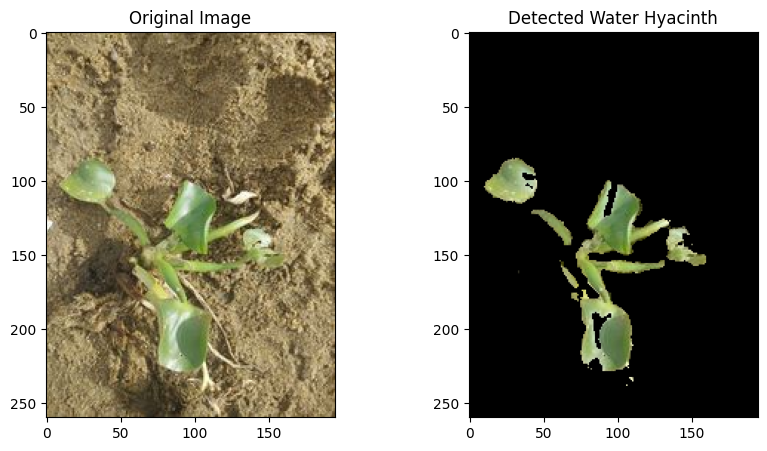

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Corrected image path
image_path = "/content/data/imagesv2/water_hyacinth_1.jpg"  # Update with an existing image
img = cv2.imread(image_path)

# Check if image loaded successfully
if img is None:
    print("Error: Unable to load image. Check the file path!")
else:
    # Convert image to HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Define HSV range for water hyacinth (Green shades)
    lower_green = np.array([30, 40, 40])
    upper_green = np.array([90, 255, 255])

    # Create mask
    mask = cv2.inRange(hsv, lower_green, upper_green)
    result = cv2.bitwise_and(img, img, mask=mask)

    # Display original & processed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title("Detected Water Hyacinth")

    plt.show()


Processing 584 images...


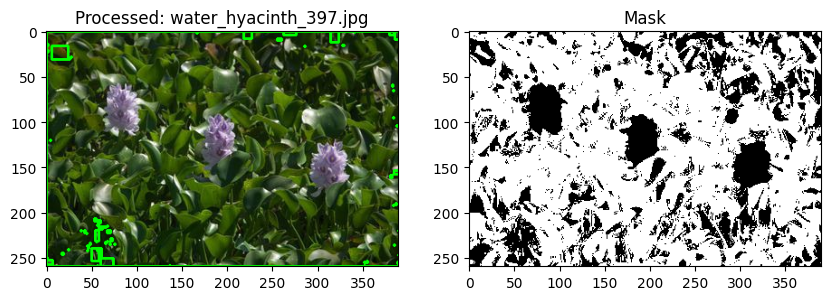

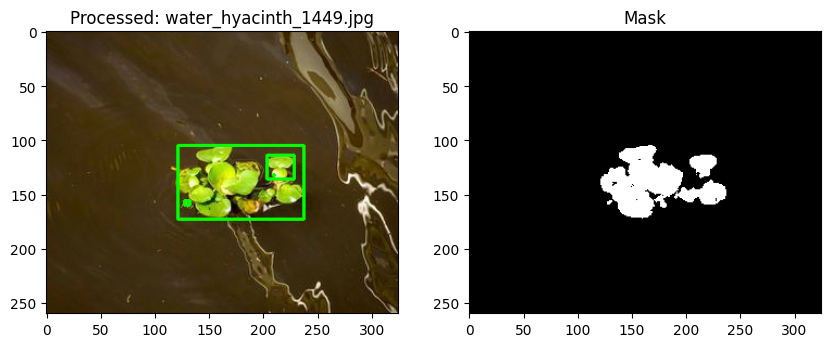

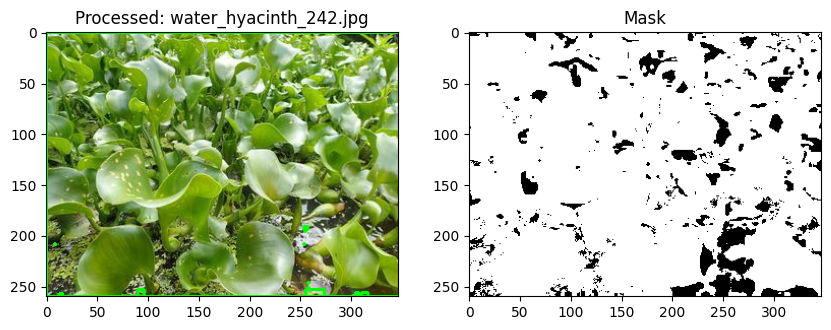

Processing complete! Results saved in /content/data/detected_images


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Paths
data_dir = "/content/data/imagesv2"  # Update if needed
output_dir = "/content/data/detected_images"

# Create output directory if not exists
os.makedirs(output_dir, exist_ok=True)

# Define HSV range for detecting green water hyacinths
lower_green = np.array([30, 40, 40])
upper_green = np.array([90, 255, 255])

# Get list of images
image_files = [f for f in os.listdir(data_dir) if f.endswith(('.jpg', '.png'))]

print(f"Processing {len(image_files)} images...")

# Loop through all images
for img_file in image_files:
    image_path = os.path.join(data_dir, img_file)
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error loading {img_file}, skipping...")
        continue

    # Convert to HSV and apply mask
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_green, upper_green)
    result = cv2.bitwise_and(img, img, mask=mask)

    # Find contours and draw bounding boxes
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Green box

    # Save processed image
    output_path = os.path.join(output_dir, img_file)
    cv2.imwrite(output_path, img)

    # Show a few sample results
    if image_files.index(img_file) < 3:  # Display first 3 images only
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(f"Processed: {img_file}")

        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap="gray")
        plt.title("Mask")

        plt.show()

print(f"Processing complete! Results saved in {output_dir}")


In [ ]:
num_hyacinths = len(contours)
print(f"Detected {num_hyacinths} hyacinths")

Detected 185 hyacinths


In [ ]:
cv2.imwrite(f"/content/data/detected_images/{img_file}", img)

True